# Objective
- Pure CNN Network
- Lenss then 10,000 trainable perameters
- Accuracy more then **99.40%**

# Improting nessary Libary

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# importing the mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

In [3]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


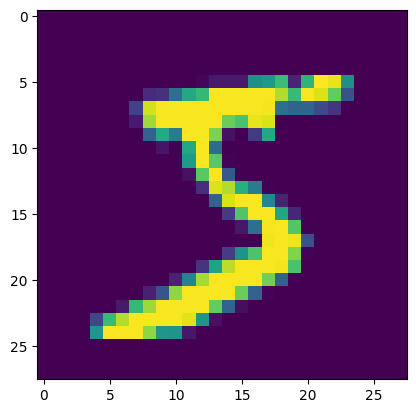

In [4]:
print (X_train.shape)

plt.imshow(X_train[0])
plt.show()

In [5]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255.0
X_test /= 255.0

In [7]:
#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [9]:

# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Given Model

In [ ]:
def given_model():
    # building our sequential model using the Sequential class and creating the model object
    model = Sequential()
    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))  # channel dimensions = 26x26x10    and Receptive field = 3x3
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(16, 3, 3, activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing 2dconvolution followed Maxpoooling operation
    model.add(Conv2D(10, 1, 1, activation='relu'))   #24                  # channel dimensions = 24x24x10    and Receptive field = 7x7 using 1x1 kernel
    model.add(MaxPooling2D(pool_size=(2, 2)))       #12                                 # channel dimensions = 12x12x10    and Receptive field = 14x14

    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(16, 3, 3, activation='relu'))#10                     # channel dimensions = 10x10x16    and Receptive field = 16x16
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(16, 3, 3, activation='relu'))#8                      # channel dimensions = 8x8x16    and Receptive field = 18x18
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(16, 3, 3, activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 20x20
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing 2dconvolution followed by BatchNormalization and Dropout
    model.add(Conv2D(16, 3, 3, activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 22x22
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
    model.add(Conv2D(10, 4, 4))                                           # using 4x4 kernel to see the complete image

    # Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
    model.add(Flatten())
    #Using softmax activation function at the last layer which is used for multi class classification
    model.add(Activation('softmax'))
    return model


In [ ]:
model = given_model()
model.summary()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Activation

# Modification of given model

In [ ]:


# Initialize the model
model = Sequential()

# Layer 1
model.add(Conv2D(10, kernel_size=(3,3), input_shape=(28,28,1), name="conv2d_1"))
model.add(BatchNormalization(name="batch_normalization_1"))
model.add(Dropout(0.1, name="dropout_1"))

# Layer 2
model.add(Conv2D(16, kernel_size=(3,3), name="conv2d_2"))
model.add(BatchNormalization(name="batch_normalization_2"))
model.add(Dropout(0.1, name="dropout_2"))

# Layer 3
model.add(Conv2D(10, kernel_size=(1,1), name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2,2), name="max_pooling2d_1"))

# Layer 4
model.add(Conv2D(16, kernel_size=(3,3), name="conv2d_4"))
model.add(BatchNormalization(name="batch_normalization_3"))
model.add(Dropout(0.1, name="dropout_3"))

# Layer 5
model.add(Conv2D(16, kernel_size=(3,3), name="conv2d_5"))
model.add(BatchNormalization(name="batch_normalization_4"))
model.add(Dropout(0.1, name="dropout_4"))

# Layer 6
model.add(Conv2D(16, kernel_size=(3,3), name="conv2d_6"))
model.add(BatchNormalization(name="batch_normalization_5"))
model.add(Dropout(0.1, name="dropout_5"))

# Layer 7
model.add(Conv2D(16, kernel_size=(3,3), name="conv2d_7"))
model.add(BatchNormalization(name="batch_normalization_6"))
model.add(Dropout(0.1, name="dropout_6"))

# Layer 8
model.add(Conv2D(10, kernel_size=(4,4), name="conv2d_8"))

# Flatten and Activation
model.add(Flatten(name="flatten_1"))
model.add(Activation('softmax', name="activation_1"))


# Print the model summary to check
model.summary()


## Training

In [ ]:
# We are importing the Adam Optimizer
from tensorflow.keras.optimizers import Adam

# We are importing the learningratescheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/20
469/469 [==============================] - 88s 183ms/step - loss: 0.2759 - accuracy: 0.9137 - val_loss: 0.2919 - val_accuracy: 0.9068 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/20
469/469 [==============================] - 78s 167ms/step - loss: 0.1245 - accuracy: 0.9612 - val_loss: 0.0927 - val_accuracy: 0.9729 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/20
469/469 [==============================] - 77s 164ms/step - loss: 0.1093 - accuracy: 0.9662 - val_loss: 0.0726 - val_accuracy: 0.9758 - lr: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0015329586.
Epoch 4/20
469/469 [==============================] - 78s 165ms/step - loss: 0.1001 - accuracy: 0.9690 - val_loss: 0.0838 - val_accuracy: 0.9739 - lr: 0.0015

Epoch 5: LearningRateScheduler setting learning rate to 0.0013181019.
Epoch 5/20
469/469 [

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 4s 13ms/step - loss: 0.0617 - accuracy: 0.9802


In [ ]:
#Finally we are doing the predictions
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [ ]:
# Showing the results of predictions
for val in y_pred[:9]:
    print(np.argmax(val), end=" ")
print()
print(y_test[:9])

7 2 1 0 4 1 4 9 5 
[7 2 1 0 4 1 4 9 5]


# Less Training Paremeters

In [41]:
model_opt = Sequential()

model_opt.add(Conv2D(8, kernel_size=(5,5), input_shape=(28,28,1)))
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.1))

# model_opt.add(Conv2D(8, kernel_size=(3,3)))
# model_opt.add(BatchNormalization())
# model_opt.add(Dropout(0.1))

model_opt.add(Conv2D(10, kernel_size=(1,1)))
model_opt.add(MaxPooling2D(pool_size=(2,2)))

# model_opt.add(Conv2D(8, kernel_size=(3,3)))
# model_opt.add(BatchNormalization())
# model_opt.add(Dropout(0.1))

model_opt.add(Conv2D(16, kernel_size=(5,5)))
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.1))

# model_opt.add(Conv2D(16, kernel_size=(3,3)))
# model_opt.add(BatchNormalization())
# model_opt.add(Dropout(0.1))

# model_opt.add(Conv2D(16, kernel_size=(5,5)))
# model_opt.add(BatchNormalization())
# model_opt.add(Dropout(0.1))

model_opt.add(Conv2D(8, kernel_size=(5,5)))
model_opt.add(BatchNormalization())
model_opt.add(Dropout(0.1))

# model_opt.add(Conv2D(8, kernel_size=(3,3)))
# model_opt.add(BatchNormalization())
# model_opt.add(Dropout(0.1))

model_opt.add(Conv2D(10, kernel_size=(4,4)))

# Flatten and Activation
model_opt.add(Flatten())
model_opt.add(Activation('softmax'))


# Print the model_opt summary to check
model_opt.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 batch_normalization_49 (Ba  (None, 24, 24, 8)         32        
 tchNormalization)                                               
                                                                 
 dropout_49 (Dropout)        (None, 24, 24, 8)         0         
                                                                 
 conv2d_80 (Conv2D)          (None, 24, 24, 10)        90        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 12, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 8, 8, 16)        

In [42]:
# We are importing the Adam Optimizer
from tensorflow.keras.optimizers import Adam

# We are importing the learningratescheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model_opt.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model_opt.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[LearningRateScheduler(scheduler, verbose=1)]
          )


Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/20
469/469 [==============================] - 51s 103ms/step - loss: 0.2967 - accuracy: 0.9098 - val_loss: 0.1232 - val_accuracy: 0.9611 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/20
469/469 [==============================] - 50s 107ms/step - loss: 0.1207 - accuracy: 0.9630 - val_loss: 0.1101 - val_accuracy: 0.9664 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/20
469/469 [==============================] - 48s 102ms/step - loss: 0.1020 - accuracy: 0.9686 - val_loss: 0.1124 - val_accuracy: 0.9652 - lr: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0015329586.
Epoch 4/20
469/469 [==============================] - 47s 101ms/step - loss: 0.0925 - accuracy: 0.9713 - val_loss: 0.0785 - val_accuracy: 0.9757 - lr: 0.0015

Epoch 5: LearningRateScheduler setting learning rate to 0.0013181019.
Epoch 5/20
469/469 [

In [18]:
score = model_opt.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.0579 - accuracy: 0.9824


In [ ]:
y_pred = model_opt.predict(X_test)
# Showing the results of predictions
for val in y_pred[:9]:
    print(np.argmax(val), end=" ")
print()
print(y_test[:9])

313/313 [==============================] - 4s 14ms/step
7 2 1 0 4 1 4 9 5 
[7 2 1 0 4 1 4 9 5]
